# This is a notebook for querying the merged Eutro WB for Chl, Oxygen and Nutrients instance for the 1.0.0 Beacon release.
* You can run each cell individually by pressing "shift + enter".
* For more information, questions, bugs, please contact us on Slack:
    + https://join.slack.com/t/beacontechnic-wwa5548/shared_invite/zt-2dp1vv56r-tj_KFac0sAKNuAgUKPPDRg.

#### In order to get access to the Beacon endpoint, you need to fill in your unique personal token between the " " in the cell below.

In [ ]:
Token = ""

#### Install the following packages, if you have not already installed them in your environment:
* pip install requests
* pip install xarray
* pip install ipywidgets
* pip install cartopy
* pip install h5netcdf
* pip install netcdf4
* pip install scipy
* pip install packaging

#### Import the required packages

In [2]:
import requests
import json
import xarray as xr
import datetime
import pandas as pd
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

#### Retrieve the available columns from the Merged TS endpoint
Swagger page here: https://beacon-wb1-ts.maris.nl/swagger/ 

In [3]:
responseinfo = requests.get("https://beacon-wb2-eutrophication.maris.nl/api/query/available-columns",
                            headers={"Authorization": f"Bearer {Token}"})

params = responseinfo.json()

#### Below you can search through the available columns by entering text between the brackets of search_columns(" ").

In [4]:
def search_columns(search_term):
    search_term = search_term.lower()
    matches = [col for col in params if search_term in col.lower()]

    if matches:
        print("Matching columns:")
        for match in matches:
            print(match)
    else:
        print("No matching columns found.")


search_columns("chl")  # Enter your search term here

Matching columns:
CHLT
CHLT_QC
CHLT.standard_name
CHLT.units
COMMON_ORIGIN_CHLOROPHYLL
COMMON_ORIGIN_CHLOROPHYLL_QC
COMMON_ORIGIN_CHLOROPHYLL_STANDARD_NAME
COMMON_ORIGIN_CHLOROPHYLL_P01
COMMON_ORIGIN_CHLOROPHYLL_UNITS
COMMON_ORIGIN_CHLOROPHYLL_P06
COMMON_CHLOROPHYLL_PER_VOLUME
COMMON_CHLOROPHYLL_PER_VOLUME_QC
COMMON_CHLOROPHYLL_PER_VOLUME_UNITS
COMMON_CHLOROPHYLL_PER_VOLUME_STANDARD_NAME
COMMON_CHLOROPHYLL_PER_VOLUME_P01
COMMON_CHLOROPHYLL_PER_VOLUME_P06
COMMON_CHLOROPHYLL_L05
COMMON_CHLOROPHYLL_L06
COMMON_CHLOROPHYLL_L22
COMMON_CHLOROPHYLL_L35
Chlorophyll
Chlorophyll_WODflag
Chlorophyll.units
Chlorophyll.standard_name
Water body chlorophyll-a
Water body chlorophyll-a_qc
Water body chlorophyll-a.units


#### You can define here your input parameters 

In [6]:
parameter = "COMMON_CHLOROPHYLL_PER_VOLUME"  # column name
mindate = "2003-01-01"  # yyyy-mm-dd
maxdate = "2003-12-31"  # yyyy-mm-dd
minlon = -44
maxlon = 5
minlat = 15
maxlat = 60
mindepth = 0
maxdepth = 100

#### This will create the query body based on your input parameters, you can add other "query_parameters" and "filters" to suit your needs. 
* For more query examples and explanations, you can take a look at https://github.com/maris-development/beacon-blue-cloud.  

In [28]:
def query(parameter, mindate, maxdate, minlon, maxlon, minlat, maxlat, mindepth, maxdepth):
    body = {
        "query_parameters": [
            {
                "column_name": parameter,
                "alias": parameter,
                "skip_fill_values": True
            },
            {
                "column_name": "COMMON_TIME",
                "alias": "datetime"
            },
            {
                "column_name": f"{parameter}_UNITS",
                "alias": f"{parameter}_UNITS"
            },
             {
                "column_name": "COMMON_ORIGIN_CHLOROPHYLL_UNITS",
                "alias": "COMMON_ORIGIN_CHLOROPHYLL_UNITS"
            },
            {
                "column_name": f"{parameter}_QC",
                "alias": f"{parameter}_QC"
            },
            {
                "column_name": f"{parameter}_P01",
                "alias": f"{parameter}_P01",
                "optional": True
            },
            {
                "column_name": "COMMON_ORIGIN_CHLOROPHYLL_P01",
                "alias": "COMMON_ORIGIN_CHLOROPHYLL_P01",
                "optional": True
            },
            {
                "column_name": f"{parameter}_P06",
                "alias": f"{parameter}_P06",
                "optional": True
            },
            {
                "column_name": "COMMON_ORIGIN_CHLOROPHYLL_P06",
                "alias": "COMMON_ORIGIN_CHLOROPHYLL_P06",
                "optional": True
            },
            {
                "column_name": f"{parameter}_STANDARD_NAME",
                "alias": f"{parameter}_STANDARD_NAME",
                "optional": True
            },
            {
                "column_name": "COMMON_ORIGIN_CHLOROPHYLL_STANDARD_NAME",
                "alias": "COMMON_ORIGIN_CHLOROPHYLL_STANDARD_NAME",
                "optional": True
            },
            # DEPTH
            {
                "column_name": "COMMON_DEPTH",
                "alias": "DEPTH"
            },
            {
                "column_name": "COMMON_DEPTH_P01",
                "alias": "COMMON_DEPTH_P01"
            },
            {
                "column_name": "COMMON_DEPTH_P06",
                "alias": "COMMON_DEPTH_P06"
            },
            {
                "column_name": "COMMON_DEPTH_QC",
                "alias": "COMMON_DEPTH_QC"
            },
            {
                "column_name": "COMMON_DEPTH_STANDARD_NAME",
                "alias": "COMMON_DEPTH_STANDARD_NAME"
            },
            {
                "column_name": "COMMON_DEPTH_UNITS",
                "alias": "ORIGINAL_DEPTH_UNITS"
            },
            {
                "column_name": "COMMON_LONGITUDE",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "COMMON_LATITUDE",
                "alias": "LATITUDE"
            },
            # BDI's
            {
                "column_name": "SOURCE_BDI",
                "alias": "SOURCE_BDI"
            },
            {
                "column_name": "SOURCE_BDI_DATASET_ID",
                "alias": "SOURCE_BDI_DATASET_ID"
            },
            # INSTRUMENTS
            {
                "column_name": "COMMON_CHLOROPHYLL_L05",
                "alias": "COMMON_CHLOROPHYLL_L05"
            }, 
            {
                "column_name": "COMMON_CHLOROPHYLL_L06",
                "alias": "COMMON_CHLOROPHYLL_L06"
            }, 
            {
                "column_name": "COMMON_CHLOROPHYLL_L22",
                "alias": "COMMON_CHLOROPHYLL_L22"
            }, 
            {
                "column_name": "COMMON_CHLOROPHYLL_L35",
                "alias": "COMMON_CHLOROPHYLL_L35"
            }           
        ],
        "filters": [
            {
                "for_query_parameter": "datetime",
                "min": f"{mindate}T00:00:00",
                "max": f"{maxdate}T00:00:00",
                "cast": "timestamp"
            },
            {
                "for_query_parameter": "DEPTH",
                "min": mindepth,
                "max": maxdepth
            },
            {
                "for_query_parameter": "LONGITUDE",
                "min": minlon,
                "max": maxlon
            },
            {
                "for_query_parameter": "LATITUDE",
                "min": minlat,
                "max": maxlat
            },
            {
            "and": [
                {
                    "is_not_null": {
                        "for_query_parameter": "COMMON_CHLOROPHYLL_PER_VOLUME",
                        
                                }
                    }
                ]
            }
        ],
        "output": {
            "format": "netcdf"
        }}
    return body


query_body = query(parameter, mindate, maxdate, minlon,
                   maxlon, minlat, maxlat, mindepth, maxdepth)

#### This is the post request that is sent to Beacon with the above specified body.

In [29]:
response = requests.post("https://beacon-wb2-eutrophication.maris.nl/api/query", json.dumps(query_body), headers={
    "Authorization": f"Bearer {Token}",
    "Content-type": "application/json"
})

if response.status_code == 204:
    print("No data has been found for your query, please update your input fields above and run the notebook again.")
elif response.status_code != 200:
    print(response.text)

In [30]:
regionname = f"[{minlat},{minlon}],[{maxlat},{maxlon}]"

if not os.path.exists("./Beacon_V1.0.0_Output"):
    os.makedirs("Beacon_V1.0.0_Output")

open(
    f"./Beacon_V1.0.0_Output/EWB_merged_{parameter}_{regionname}_{mindate}-{maxdate}_[{mindepth}-{maxdepth}m].nc", "wb").write(response.content)
df = xr.open_dataset(
    f"./Beacon_V1.0.0_Output/EWB_merged_{parameter}_{regionname}_{mindate}-{maxdate}_[{mindepth}-{maxdepth}m].nc").to_dataframe()
df = df.assign(datetime=pd.to_datetime(
    df["datetime"])).set_index("datetime").sort_index()
df

COMMON_CHLOROPHYLL_PER_VOLUME  \
datetime                                             
2003-01-02 10:17:00                           1.00   
2003-01-02 10:17:00                           1.00   
2003-01-06 08:10:00                           0.38   
2003-01-06 09:05:00                           0.33   
2003-01-06 11:00:00                           0.47   
...                                            ...   
2003-12-30 10:32:00                           1.11   
2003-12-30 13:45:00                           0.80   
2003-12-30 14:06:59                           2.00   
2003-12-30 14:07:00                           2.00   
2003-12-30 14:15:00                           0.57   

                    COMMON_CHLOROPHYLL_PER_VOLUME_UNITS  \
datetime                                                  
2003-01-02 10:17:00                              mg/m^3   
2003-01-02 10:17:00                              mg/m^3   
2003-01-06 08:10:00                              mg/m^3   
2003-01-06 09:05:00                              mg/m^3   
2003-01-06 11:00:00                              mg/m^3   
...                                                 ...   
2003-12-30 10:32:00                              mg/m^3   
2003-12-30 13:45:00                              mg/m^3   
2003-12-30 14:06:59                              mg/m^3   
2003-12-30 14:07:00                              mg/m^3   
2003-12-30 14:15:00                              mg/m^3   

                    COMMON_ORIGIN_CHLOROPHYLL_UNITS  \
datetime                                              
2003-01-02 10:17:00                          mg/m^3   
2003-01-02 10:17:00                         ugram/l   
2003-01-06 08:10:00                          mg/m^3   
2003-01-06 09:05:00                          mg/m^3   
2003-01-06 11:00:00                          mg/m^3   
...                                             ...   
2003-12-30 10:32:00                          mg/m^3   
2003-12-30 13:45:00                          mg/m^3   
2003-12-30 14:06:59                         ugram/l   
2003-12-30 14:07:00                          mg/m^3   
2003-12-30 14:15:00                          mg/m^3   

                    COMMON_CHLOROPHYLL_PER_VOLUME_QC  \
datetime                                               
2003-01-02 10:17:00                              1.0   
2003-01-02 10:17:00                                1   
2003-01-06 08:10:00                              1.0   
2003-01-06 09:05:00                              1.0   
2003-01-06 11:00:00                              1.0   
...                                              ...   
2003-12-30 10:32:00                              1.0   
2003-12-30 13:45:00                              1.0   
2003-12-30 14:06:59                                1   
2003-12-30 14:07:00                              1.0   
2003-12-30 14:15:00                              1.0   

                    COMMON_CHLOROPHYLL_PER_VOLUME_P01  \
datetime                                                
2003-01-02 10:17:00                 SDN:P01::CHLTVOLU   
2003-01-02 10:17:00                 SDN:P01::CHLTVOLU   
2003-01-06 08:10:00                 SDN:P01::CHLTVOLU   
2003-01-06 09:05:00                 SDN:P01::CHLTVOLU   
2003-01-06 11:00:00                 SDN:P01::CHLTVOLU   
...                                               ...   
2003-12-30 10:32:00                 SDN:P01::CHLTVOLU   
2003-12-30 13:45:00                 SDN:P01::CHLTVOLU   
2003-12-30 14:06:59                 SDN:P01::CHLTVOLU   
2003-12-30 14:07:00                 SDN:P01::CHLTVOLU   
2003-12-30 14:15:00                 SDN:P01::CHLTVOLU   

                    COMMON_ORIGIN_CHLOROPHYLL_P01  \
datetime                                            
2003-01-02 10:17:00             SDN:P01::CPHLZZXX   
2003-01-02 10:17:00             SDN:P01::CHLTVOLU   
2003-01-06 08:10:00             SDN:P01::CPHLZZXX   
2003-01-06 09:05:00             SDN:P01::CPHLZZXX   
2003-01-06 11:00:00             SDN:P01::CPHL

#### Optionally apply a filter on your parameter for quick removal of outliers. Note that this can also be achieved within your Beacon request by applying a filter on your parameter. 

In [31]:
highbound = 10
lowbound = 0
df = df.loc[(df[f"{parameter}"] < highbound) & (df[f"{parameter}"] > lowbound)]
df

COMMON_CHLOROPHYLL_PER_VOLUME  \
datetime                                             
2003-01-02 10:17:00                           1.00   
2003-01-02 10:17:00                           1.00   
2003-01-06 08:10:00                           0.38   
2003-01-06 09:05:00                           0.33   
2003-01-06 11:00:00                           0.47   
...                                            ...   
2003-12-30 10:32:00                           1.11   
2003-12-30 13:45:00                           0.80   
2003-12-30 14:06:59                           2.00   
2003-12-30 14:07:00                           2.00   
2003-12-30 14:15:00                           0.57   

                    COMMON_CHLOROPHYLL_PER_VOLUME_UNITS  \
datetime                                                  
2003-01-02 10:17:00                              mg/m^3   
2003-01-02 10:17:00                              mg/m^3   
2003-01-06 08:10:00                              mg/m^3   
2003-01-06 09:05:00                              mg/m^3   
2003-01-06 11:00:00                              mg/m^3   
...                                                 ...   
2003-12-30 10:32:00                              mg/m^3   
2003-12-30 13:45:00                              mg/m^3   
2003-12-30 14:06:59                              mg/m^3   
2003-12-30 14:07:00                              mg/m^3   
2003-12-30 14:15:00                              mg/m^3   

                    COMMON_ORIGIN_CHLOROPHYLL_UNITS  \
datetime                                              
2003-01-02 10:17:00                          mg/m^3   
2003-01-02 10:17:00                         ugram/l   
2003-01-06 08:10:00                          mg/m^3   
2003-01-06 09:05:00                          mg/m^3   
2003-01-06 11:00:00                          mg/m^3   
...                                             ...   
2003-12-30 10:32:00                          mg/m^3   
2003-12-30 13:45:00                          mg/m^3   
2003-12-30 14:06:59                         ugram/l   
2003-12-30 14:07:00                          mg/m^3   
2003-12-30 14:15:00                          mg/m^3   

                    COMMON_CHLOROPHYLL_PER_VOLUME_QC  \
datetime                                               
2003-01-02 10:17:00                              1.0   
2003-01-02 10:17:00                                1   
2003-01-06 08:10:00                              1.0   
2003-01-06 09:05:00                              1.0   
2003-01-06 11:00:00                              1.0   
...                                              ...   
2003-12-30 10:32:00                              1.0   
2003-12-30 13:45:00                              1.0   
2003-12-30 14:06:59                                1   
2003-12-30 14:07:00                              1.0   
2003-12-30 14:15:00                              1.0   

                    COMMON_CHLOROPHYLL_PER_VOLUME_P01  \
datetime                                                
2003-01-02 10:17:00                 SDN:P01::CHLTVOLU   
2003-01-02 10:17:00                 SDN:P01::CHLTVOLU   
2003-01-06 08:10:00                 SDN:P01::CHLTVOLU   
2003-01-06 09:05:00                 SDN:P01::CHLTVOLU   
2003-01-06 11:00:00                 SDN:P01::CHLTVOLU   
...                                               ...   
2003-12-30 10:32:00                 SDN:P01::CHLTVOLU   
2003-12-30 13:45:00                 SDN:P01::CHLTVOLU   
2003-12-30 14:06:59                 SDN:P01::CHLTVOLU   
2003-12-30 14:07:00                 SDN:P01::CHLTVOLU   
2003-12-30 14:15:00                 SDN:P01::CHLTVOLU   

                    COMMON_ORIGIN_CHLOROPHYLL_P01  \
datetime                                            
2003-01-02 10:17:00             SDN:P01::CPHLZZXX   
2003-01-02 10:17:00             SDN:P01::CHLTVOLU   
2003-01-06 08:10:00             SDN:P01::CPHLZZXX   
2003-01-06 09:05:00             SDN:P01::CPHLZZXX   
2003-01-06 11:00:00             SDN:P01::CPHL

#### Plotting of results.

In [32]:
import plotly.express as px

lon = df['LONGITUDE']
lat = df['LATITUDE']
field = df[f'{parameter}']
depth = df['DEPTH']

# fig = px.scatter_mapbox(df, lon=lon, lat=lat, color=field, hover_name=df['Depth'], color_continuous_scale = px.colors.sequential.Rainbow, zoom=3, height=500)
fig = px.scatter_mapbox(df, lon=lon, lat=lat, color=field, size=depth, size_max=10, hover_data='COMMON_CHLOROPHYLL_PER_VOLUME_QC',
                        hover_name=df['SOURCE_BDI'], color_continuous_scale=px.colors.sequential.Rainbow, zoom=3, height=800)
fig.update_layout(
    title=dict(
        text=f'EWB_Merged_Beacon_instance {parameter} {regionname} {mindate}-{maxdate} [{mindepth}-{maxdepth}m] #Points = {len(df)}'),
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
    ])

fig.show()

In [33]:
print(min(lon))
print(max(lon))
print(min(lat))
print(max(lat))

-43.83330154418945
4.965670108795166
15.448333740234375
59.948001861572266


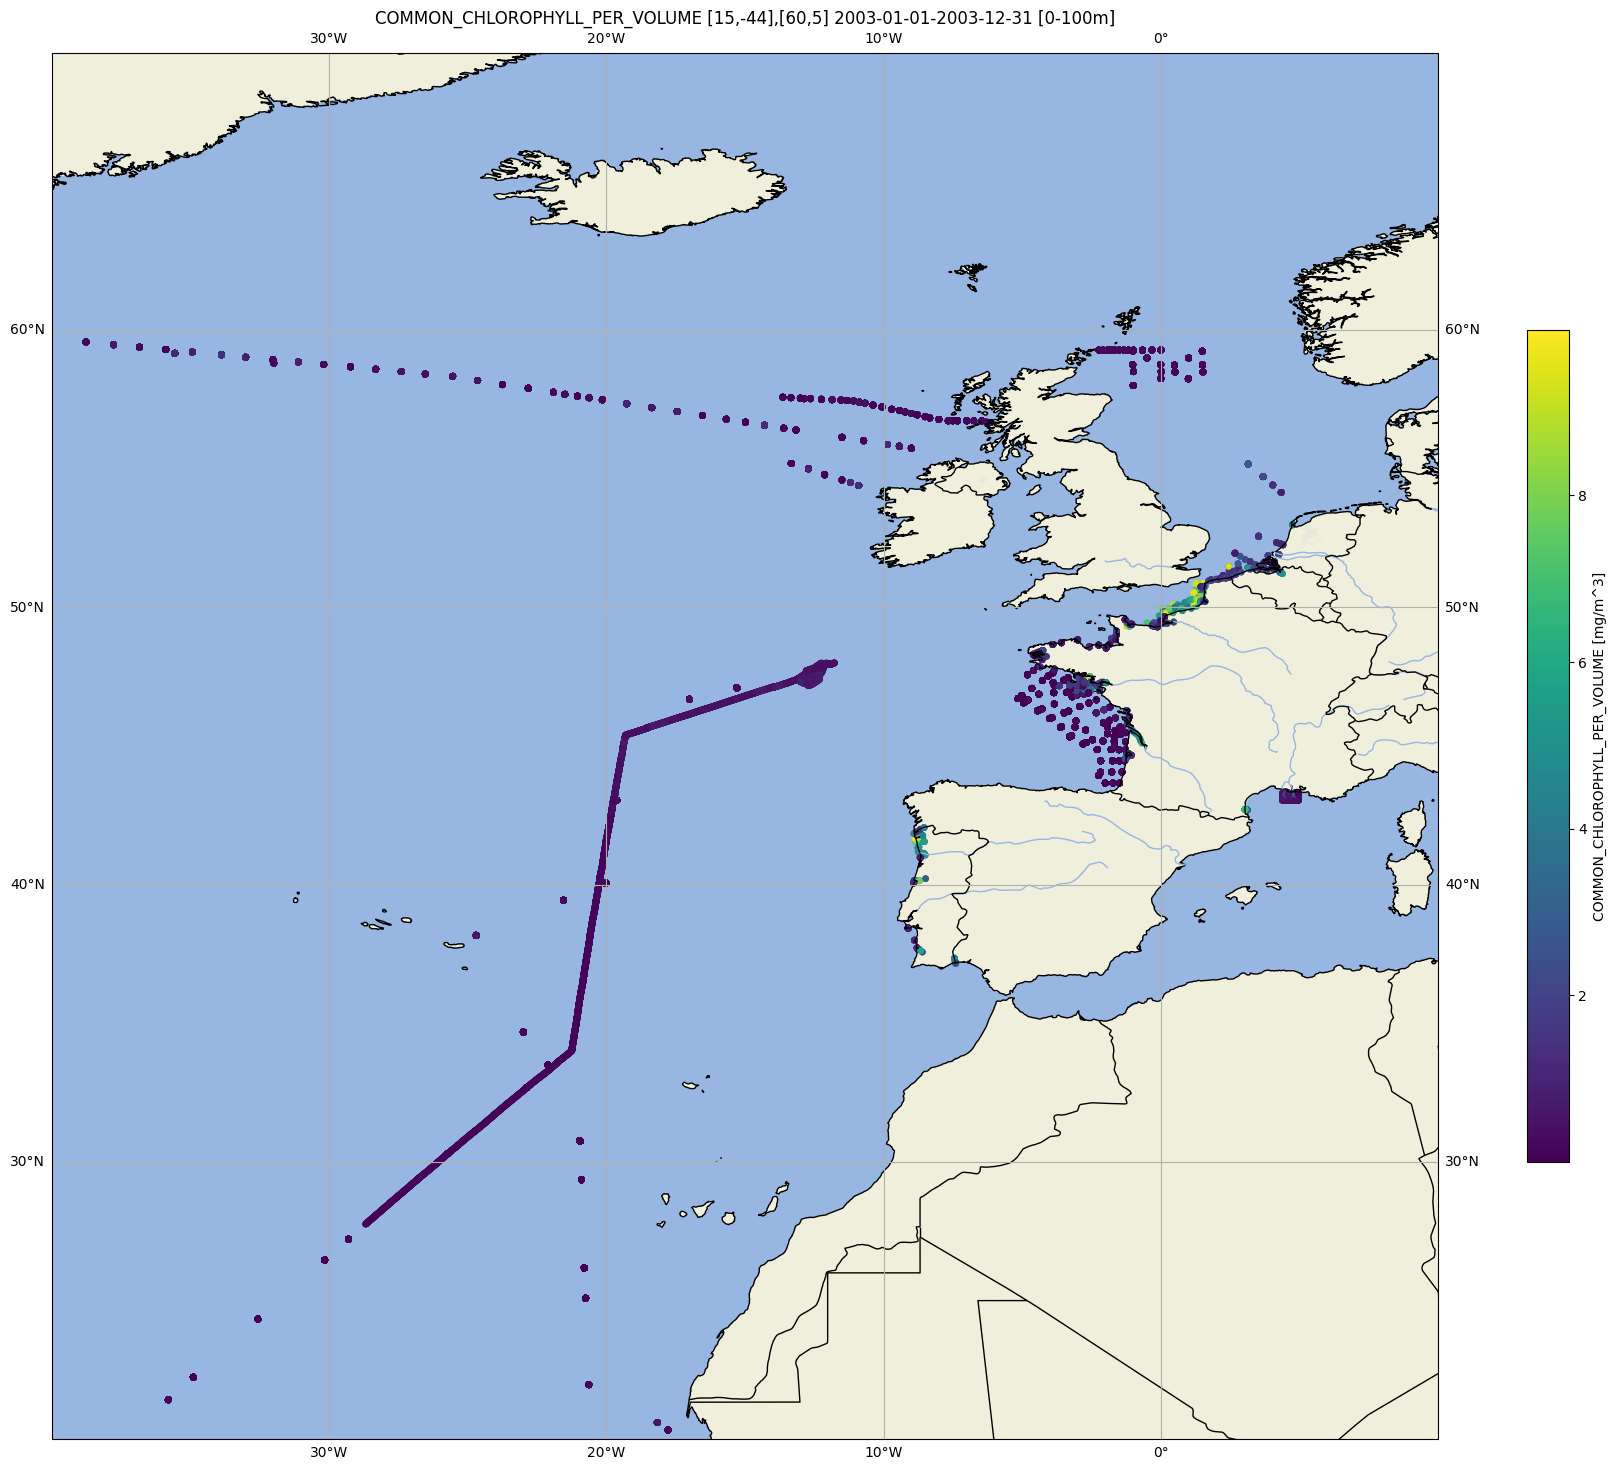

In [34]:
fig = plt.figure(figsize=(23, 18))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-40, 10, 20, 70], crs=ccrs.PlateCarree())  # (west, east, south, north)

ax.coastlines(resolution="10m")
ax.gridlines(draw_labels=True)

sc = ax.scatter(df["LONGITUDE"], df["LATITUDE"], c=df[parameter], cmap="viridis", s=15, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     
ax.add_feature(cfeature.BORDERS)   
ax.add_feature(cfeature.LAKES, alpha=0.1) 

cbar = plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.6, label="Value Set 1")
cbar.set_label(f"{parameter} [{df["COMMON_CHLOROPHYLL_PER_VOLUME_UNITS"].iloc[0]}]")

plt.title(f"{parameter} {regionname} {mindate}-{maxdate} [{mindepth}-{maxdepth}m]")

plt.show()